Ce document contient une présentation des descripteurs de couleurs utilisés. On visualise d'abord l'histogramme de couleurs de deux images d'un même objet.

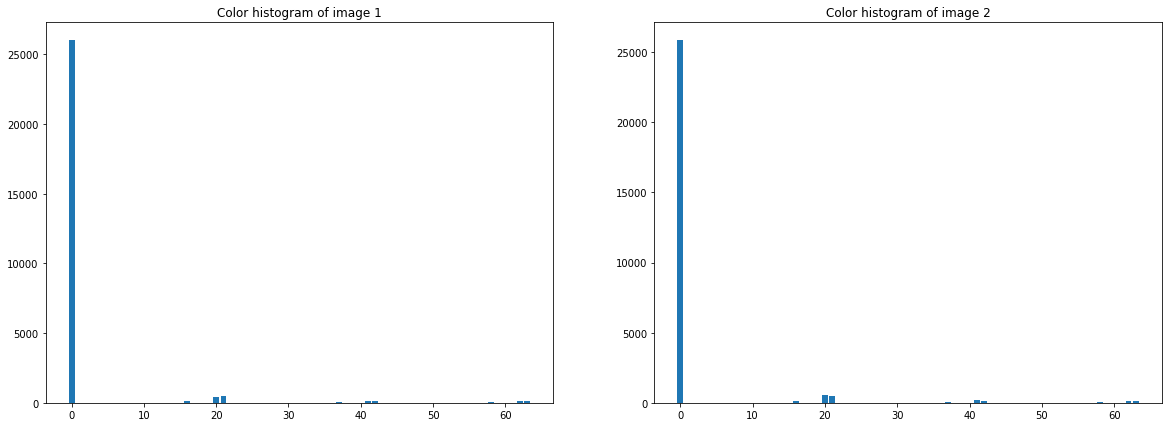

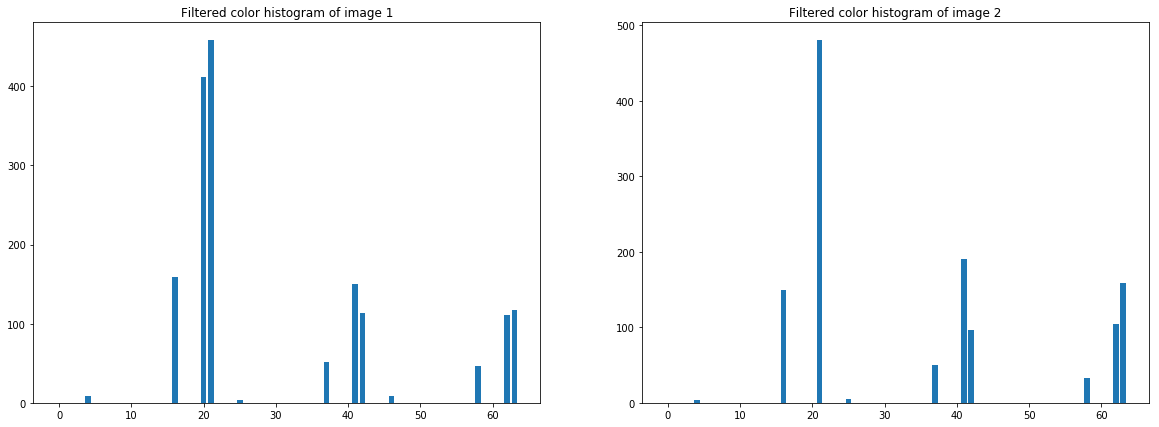

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

from Image_reading import *
from Color_descriptors import color_histogram, histogram_filter

if __name__ == '__main__':
    X1=read_image_1(300,0)
    X2=read_image_1(300,1)

    hist1=color_histogram(X1,'rgb',[4,4,4]) # color histogram computation
    hist2=color_histogram(X2,'rgb',[4,4,4])
    fig1,ax1=plt.subplots(1,2,figsize=(20,7))
    
    ax1[0].bar(np.arange(hist1.shape[0]),hist1)
    ax1[1].bar(np.arange(hist2.shape[0]),hist2)
    ax1[0].set_title("Color histogram of image 1")
    ax1[1].set_title("Color histogram of image 2")
    
    # We remove some of the compononents (of the black background) in order to compare the values for other colors.
    hist1=histogram_filter(hist1)
    hist2=histogram_filter(hist2)
    
    fig2,ax2=plt.subplots(1,2,figsize=(20,7))
    ax2[0].bar(np.arange(hist1.shape[0]),hist1)
    ax2[1].bar(np.arange(hist2.shape[0]),hist2)
    ax2[0].set_title("Filtered color histogram of image 1")
    ax2[1].set_title("Filtered color histogram of image 2")
    plt.show()
    

Ensuite, on regarde les histogrammes de couleurs de deux images, chacune appartenant à un objet différent.

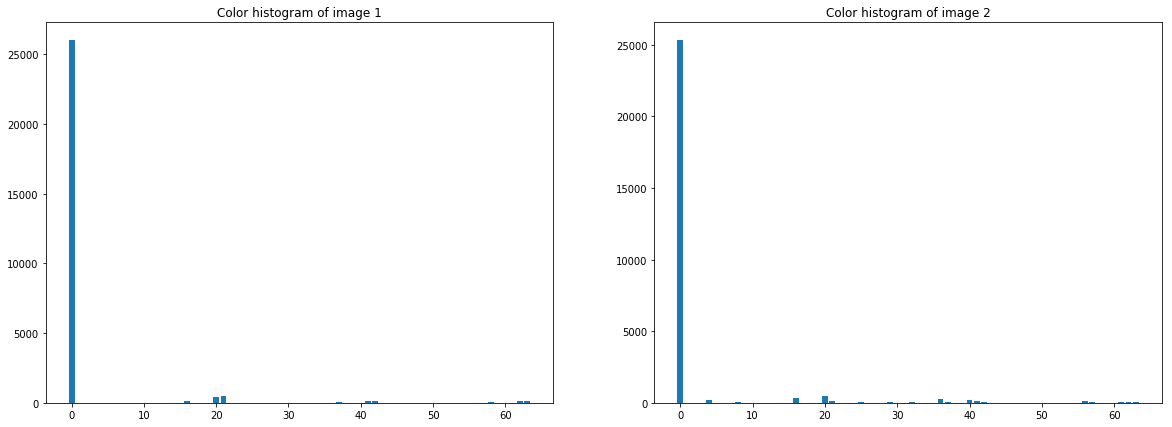

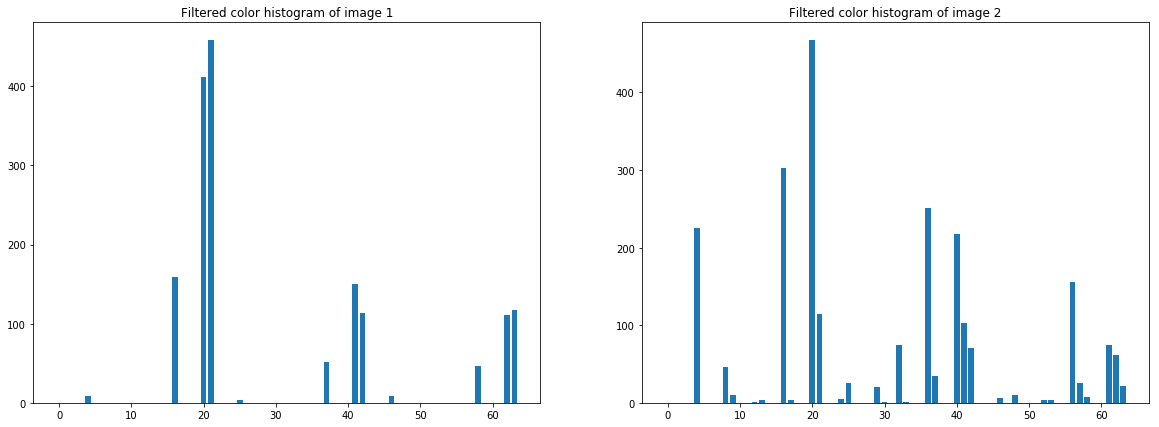

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

from Image_reading import *
from Color_descriptors import color_histogram, histogram_filter

if __name__ == '__main__':
    X1=read_image_1(300,0)
    X2=read_image_1(301,0)

    hist1=color_histogram(X1,'rgb',[4,4,4]) # color histogram computation
    hist2=color_histogram(X2,'rgb',[4,4,4])
    fig1,ax1=plt.subplots(1,2,figsize=(20,7))
    
    ax1[0].bar(np.arange(hist1.shape[0]),hist1)
    ax1[1].bar(np.arange(hist2.shape[0]),hist2)
    ax1[0].set_title("Color histogram of image 1")
    ax1[1].set_title("Color histogram of image 2")
    
    # We remove some of the compononents (of the black background) in order to compare the values for other colors.
    hist1=histogram_filter(hist1)
    hist2=histogram_filter(hist2)
    
    fig2,ax2=plt.subplots(1,2,figsize=(20,7))
    ax2[0].bar(np.arange(hist1.shape[0]),hist1)
    ax2[1].bar(np.arange(hist2.shape[0]),hist2)
    ax2[0].set_title("Filtered color histogram of image 1")
    ax2[1].set_title("Filtered color histogram of image 2")
    plt.show()
    

On voit que deux images d'un même objet ont plutôt des histogrammes de couleurs proches. Alors que deux images ont deux histogrammes de couleurs différents. Cette comparaison ne prend en compte que deux images.
Pour faire une comparaison statistiquement plus pertinente, on va regarder la répartition dans l'espace des vecteurs de caractéristiques données par les histogrammes de couleurs. On utilise une méthode de visualisation appelée TSNE. La base de données utilisée est "aloi_red4_view": Le nombre d'objets total est 20, le nombre d'images par objet est 72. Dans la visualisation, chaque point correspond à une image.

Number of images= 1440
Number of features= 64




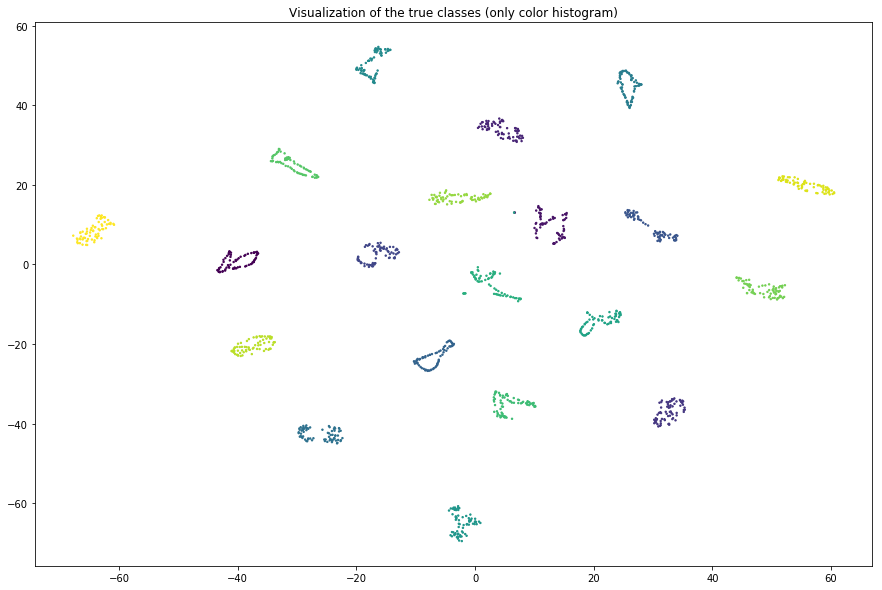

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

from Image_reading import *
from Color_descriptors import *

if __name__ == '__main__':
#   Parameters defintion:
    n1=1 # First image (included)
    n2=21 # Last image (excluded)
    n_img=72 # number of images per object
    color_space='hsv'
    bins=[4,4,4]
    
#     Classes_true is a vector containing the true classes
    classes_true=[]
    for i in range(0,n2-n1):
        classes_true=classes_true+[i]*n_img
    classes_true=np.array(classes_true)

#     First, we regroup the images features in a single 2D-Array where each line is the feature vector of the image
    X_all=[]
    for i in range(n_img*(n2-n1)):
        X_all.append([])
    for i in range(n2-n1):
        for j in range(n_img):
            X=read_image_2(i+n1,j)
            # ********************Color_histogram_features***********************
            hist= color_histogram(X,color_space,bins)
            # hist=histogram_filter(hist)
            # hist=histogram_normalization(hist)
            X_all[n_img*i+j]=X_all[n_img*i+j]+[hist]
            X_all[n_img*i+j]=np.concatenate(X_all[n_img*i+j])
    
    X_all=np.array(X_all).astype(float)
    print("Number of objects= "+ str(n2-n1))
    print("Number of images= "+ str(X_all.shape[0]))
    print("Number of features= "+ str(X_all.shape[1]))
    print("\n")
    
    
    # *********************Visualization**********************
    
    X_norm = StandardScaler().fit_transform(X_all)
    X_embedded = TSNE(n_components=2).fit_transform(X_norm)
    
    plt.figure(figsize=(15,10))
    plt.scatter(X_embedded[:,0],X_embedded[:,1],c=classes_true,s=2)
    plt.title("Visualization of the true classes (only color histogram)")
    plt.show()


On voit qu'on arrive à créer des clusters bien séparés rien qu'en utilisant ce premier descripteur de couleurs. On observe que la majorité des clusters sont convexes. On imagine alors qu'un clustering k-means avec une distance euclidienne devrait suffir pour les identifier. On va encore chercher à améliorer la séparation en introduisant d'autres caractérisations des images.

On regarde maintenant le descripteur de couleurs qui utilise un calcul des moments (comme la moyenne, la variance l'écart-type, la skewness et le kurtosis) sur les 3 canaux de couleurs pour chaque image. On visualise la répartition des points représentant les images où chaque point correspond au vecteur de caractéristiques contenant uniquement les moments de couleurs. On utilise la même collection d'image que celle utilisée précedemment.Dans la visualisation, chaque point correspond à une image.

Number of images= 1440
Number of features= 15




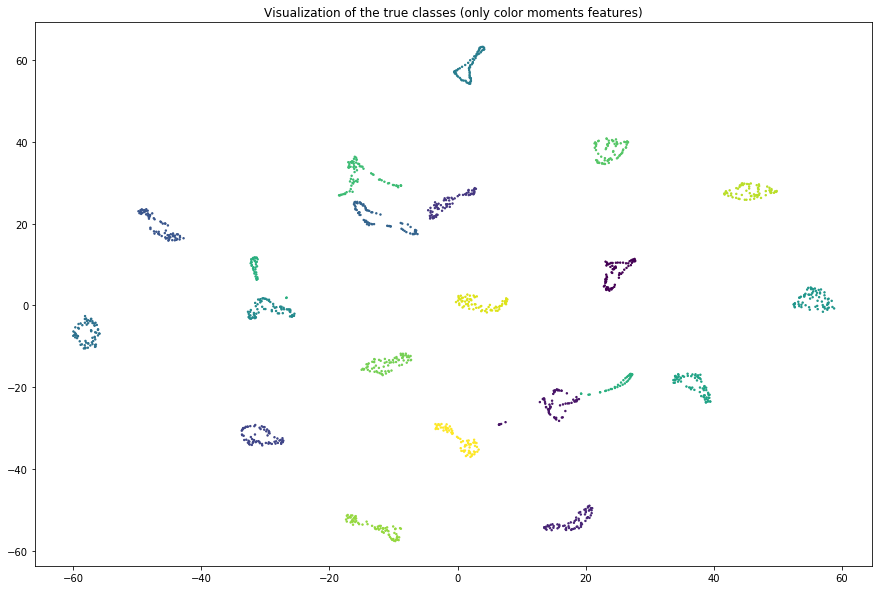

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

from Image_reading import *
from Color_descriptors import *

if __name__ == '__main__':
#   Parameters defintion:
    n1=1 # First image (included)
    n2=21 # Last image (excluded)
    n_img=72 # number of images per object
    color_space='hsv'
    bins=[4,4,4]
    
#     Classes_true is a vector containing the true classes
    classes_true=[]
    for i in range(0,n2-n1):
        classes_true=classes_true+[i]*n_img
    classes_true=np.array(classes_true)

#     First, we regroup the images features in a single 2D-Array where each line is the feature vector of the image
    X_all=[]
    for i in range(n_img*(n2-n1)):
        X_all.append([])
    for i in range(n2-n1):
        for j in range(n_img):
            X=read_image_2(i+n1,j)
            # ********************Color_moments_features***********************
            moments_ftr=moments_calcul(X,color_space)
            X_all[n_img*i+j]=X_all[n_img*i+j]+[moments_ftr]
            X_all[n_img*i+j]=np.concatenate(X_all[n_img*i+j])
    
    X_all=np.array(X_all).astype(float)
    print("Number of objects= "+ str(n2-n1))
    print("Number of images= "+ str(X_all.shape[0]))
    print("Number of features= "+ str(X_all.shape[1]))
    print("\n")
    
    
    # *********************Visualization**********************
    
    X_norm = StandardScaler().fit_transform(X_all)
    X_embedded = TSNE(n_components=2).fit_transform(X_norm)
    
    plt.figure(figsize=(15,10))
    plt.scatter(X_embedded[:,0],X_embedded[:,1],c=classes_true, s=2)
    plt.title("Visualization of the true classes (only color moments features)")
    plt.show()


On voit qu'un grand nombre clusters, cette fois, n'est pas convexe. On doit donc utiliser un clustering DBSCAN pour les identifier.

On teste maintenant les méthodes d'extraction des caractéristiques sur une autre collection d'images: "faces_1". Cette collection contient des photos de visages de 50 personnes, avec 20 photos par personne. Dans la visualisation, chaque point correspond à une image.

Number of images= 1000
Number of features= 64




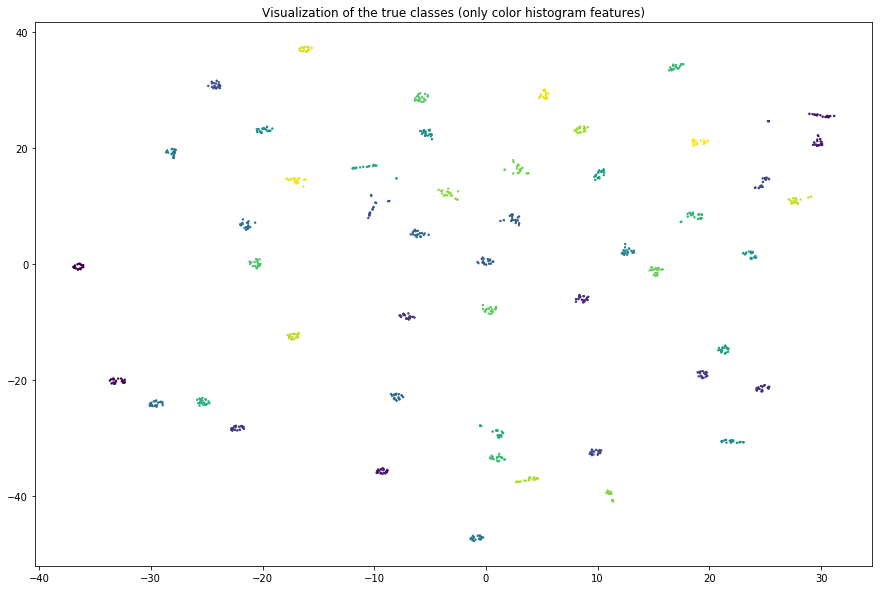

Number of images= 1000
Number of features= 15




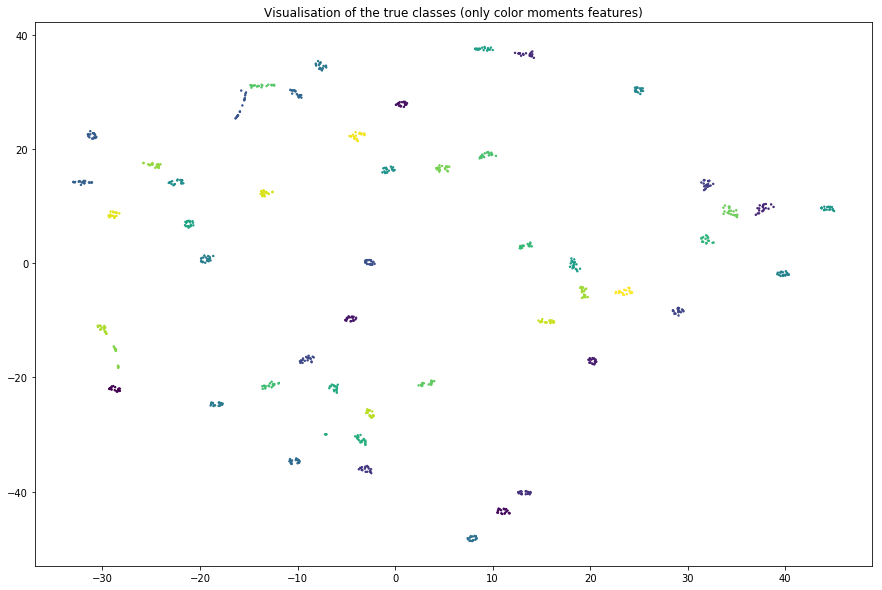

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

from Image_reading import *
from Color_descriptors import *

if __name__ == '__main__':
#   Parameters defintion:
    n1=0 # First image (included)
    n2=50 # Last image (excluded)
    n_img=20 # number of images per object
    color_space='hsv'
    bins=[4,4,4]
    
#     Classes_true is a vector containing the true classes
    classes_true=[]
    for i in range(0,n2-n1):
        classes_true=classes_true+[i]*n_img
    classes_true=np.array(classes_true)
    
#   Here, We use only the color histogram features
    X_all=[]
    for i in range(n_img*(n2-n1)):
        X_all.append([])
    for i in range(n2-n1):
        for j in range(n_img):
            X=read_image_3(i+n1,j)
            # ********************Color_histogram_features***********************
            hist= color_histogram(X,color_space,bins)
            # hist=histogram_filter(hist)
            # hist=histogram_normalization(hist)
            X_all[n_img*i+j]=X_all[n_img*i+j]+[hist]
            X_all[n_img*i+j]=np.concatenate(X_all[n_img*i+j])
    
    X_all=np.array(X_all).astype(float)
    print("Number of images= "+ str(X_all.shape[0]))
    print("Number of features= "+ str(X_all.shape[1]))
    print("\n")
    
    # *********************Visualization 1**********************
    
    X_norm = StandardScaler().fit_transform(X_all)
    X_embedded = TSNE(n_components=2).fit_transform(X_norm)
    
    plt.figure(figsize=(15,10))
    plt.scatter(X_embedded[:,0],X_embedded[:,1],c=classes_true,s=2)
    plt.title("Visualization of the true classes (only color histogram features)")
    plt.show()
    
#   Here, We use only the color moments features
    X_all=[]
    for i in range(n_img*(n2-n1)):
        X_all.append([])
    for i in range(n2-n1):
        for j in range(n_img):
            X=read_image_3(i+n1,j)
            # ********************Color_moments_features***********************
            moments_ftr=moments_calcul(X,color_space)
            X_all[n_img*i+j]=X_all[n_img*i+j]+[moments_ftr]
            X_all[n_img*i+j]=np.concatenate(X_all[n_img*i+j])
    
    X_all=np.array(X_all).astype(float)
    print("Number of persons= "+ str(n2-n1))
    print("Number of images= "+ str(X_all.shape[0]))
    print("Number of features= "+ str(X_all.shape[1]))
    print("\n")
    
    
    # *********************Visualization 2**********************
    
    X_norm = StandardScaler().fit_transform(X_all)
    X_embedded = TSNE(n_components=2).fit_transform(X_norm)
    
    plt.figure(figsize=(15,10))
    plt.scatter(X_embedded[:,0],X_embedded[:,1],c=classes_true,s=2)
    plt.title("Visualisation of the true classes (only color moments features)")
    plt.show()


On voit aussi dans les deux cas que les clusters sont bien séparés. On peut donc conclure que ces deux descripteurs de couleurs fournissent des caractéristiques pertinentes pour effectuer un clustering sur ces collections d'images.

Un autre descripteur de couleur utilisé est appelé le correlogramme de couleurs. Il permet de prendre en compte la distribution
spatiale des couleurs dans l'image. Pour chaque image, on réalise une quantification des couleurs en utilisant un histogramme de couleurs. Le correlogramme est alors calculé en comptant pour chaque pixel le nombre de pixels qui ont la même couleur définie par l'histogramme à une certaine distance. On peut utiliser plusieurs distances, ce qui rend le correlogramme une matrice 2D qu'on transforme en un vecteur 1D. 
Etant donné que le temps de calcul est élevé pour les images utilisées, on a réduit la résolution des images avant de réaliser le calcul.

Number of objects= 20
Number of images= 1440
Number of features= 8




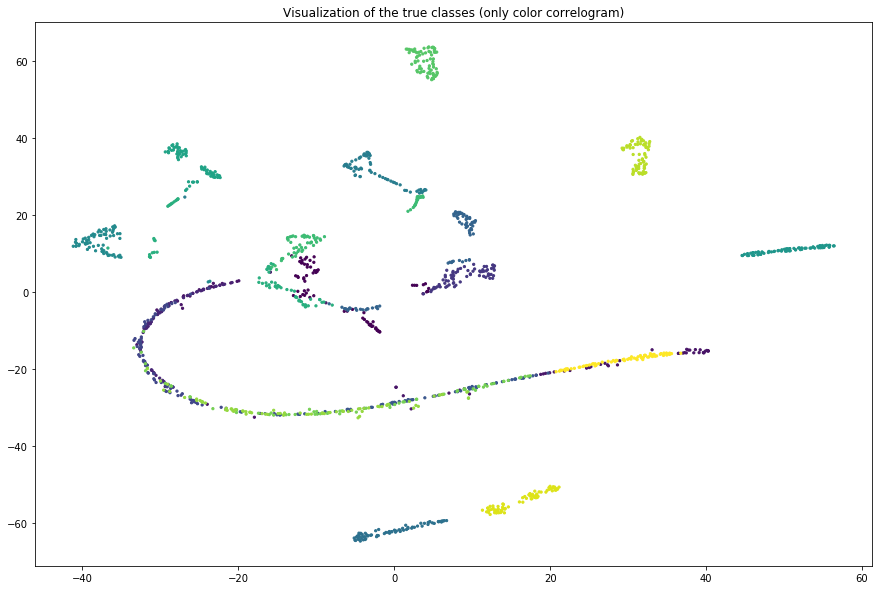

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import cv2 as cv

from Image_reading import *
from Color_descriptors import *

if __name__ == '__main__':
#   Parameters defintion:
    n1=1 # First image (included)
    n2=21 # Last image (excluded)
    n_img=72 # number of images per object
    color_space='hsv'
    bins=[2,2,2]
    distances=[4]
    
#     Classes_true is a vector containing the true classes
    classes_true=[]
    for i in range(0,n2-n1):
        classes_true=classes_true+[i]*n_img
    classes_true=np.array(classes_true)

#     First, we regroup the images features in a single 2D-Array where each line is the feature vector of the image
#     All images are resized, in order to reduce the computation time
    X_all=[]
    for i in range(n_img*(n2-n1)):
        X_all.append([])
    for i in range(n2-n1):
        for j in range(n_img):
            X=read_image_2(i+n1,j)
            nx=X.shape[0]
            ny=X.shape[1]
            m=30
            r = m / ny
            dim = (m, int(nx * r))
            X = cv.resize(X, dim, interpolation = cv.INTER_AREA)
            # ********************Color_correlogram_features***********************
            corr= color_correlogram(X,color_space,bins,distances)
            X_all[n_img*i+j]=X_all[n_img*i+j]+[corr]
            X_all[n_img*i+j]=np.concatenate(X_all[n_img*i+j])
    
    X_all=np.array(X_all).astype(float)
    print("Number of objects= "+ str(n2-n1))
    print("Number of images= "+ str(X_all.shape[0]))
    print("Number of features= "+ str(X_all.shape[1]))
    print("\n")
    
    
    # *********************Visualization**********************
    
    X_norm = StandardScaler().fit_transform(X_all)
    X_embedded = TSNE(n_components=2).fit_transform(X_norm)
    
    plt.figure(figsize=(15,10))
    plt.scatter(X_embedded[:,0],X_embedded[:,1],c=classes_true,s=5)
    plt.title("Visualization of the true classes (only color correlogram)")
    plt.show()

On voit que le calcul du correlogramme dépend de plusieurs paramètres (nombre de couleurs dans l'histogramme, distances choisies, résolution de l'image).On cherchera ultérieurement à optimiser ces paramètres pour les bases de données utilisées.